In [1]:
import pandas as pd
import numpy as np 

In [4]:
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()

,pregNo,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset[['pregNo', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']].describe()

,pregNo,glucose,bp,skin,insulin,bmi,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

#Read in the dataset and display
dataset = pd.read_csv('pima-indians-diabetes.csv')
print(dataset.head())

#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
feature_cols = ['pregNo', 'glucose', 'bp', 'insulin','bmi','pedigree', 'age']
X = dataset[feature_cols] # Features
Y = dataset['class'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred))

#How to improve the accuracy of the model? By tuning the number of features for the model

#Confusion matrix
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

print("true negative: ", tn)
print("false negative: ", fn)
print("true positive: ", tp)
print("false positive: ", fp)


   pregNo  glucose  bp  skin  insulin   bmi  pedigree  age  class
0       6      148  72    35        0  33.6     0.627   50      1
1       1       85  66    29        0  26.6     0.351   31      0
2       8      183  64     0        0  23.3     0.672   32      1
3       1       89  66    23       94  28.1     0.167   21      0
4       0      137  40    35      168  43.1     2.288   33      1


Accuracy for 70% training set and 30% test set : 0.658008658008658


[[112  34]
 [ 45  40]]


true negative:  112
false negative:  45
true positive:  40
false positive:  34


In [10]:
#Accuracy for 70% training set and 30% test set : 0.658008658008658


#[[112  34]
 #[ 45  40]]


#true negative:  112
#false negative:  45
#true positive:  40
#false positive:  34

#To verify accuracy = 65.8%
#Use the formula:
#(TN + TP)/(TN + FN + FP + TP) = 152/231 x 100% = 65.8%


In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461538

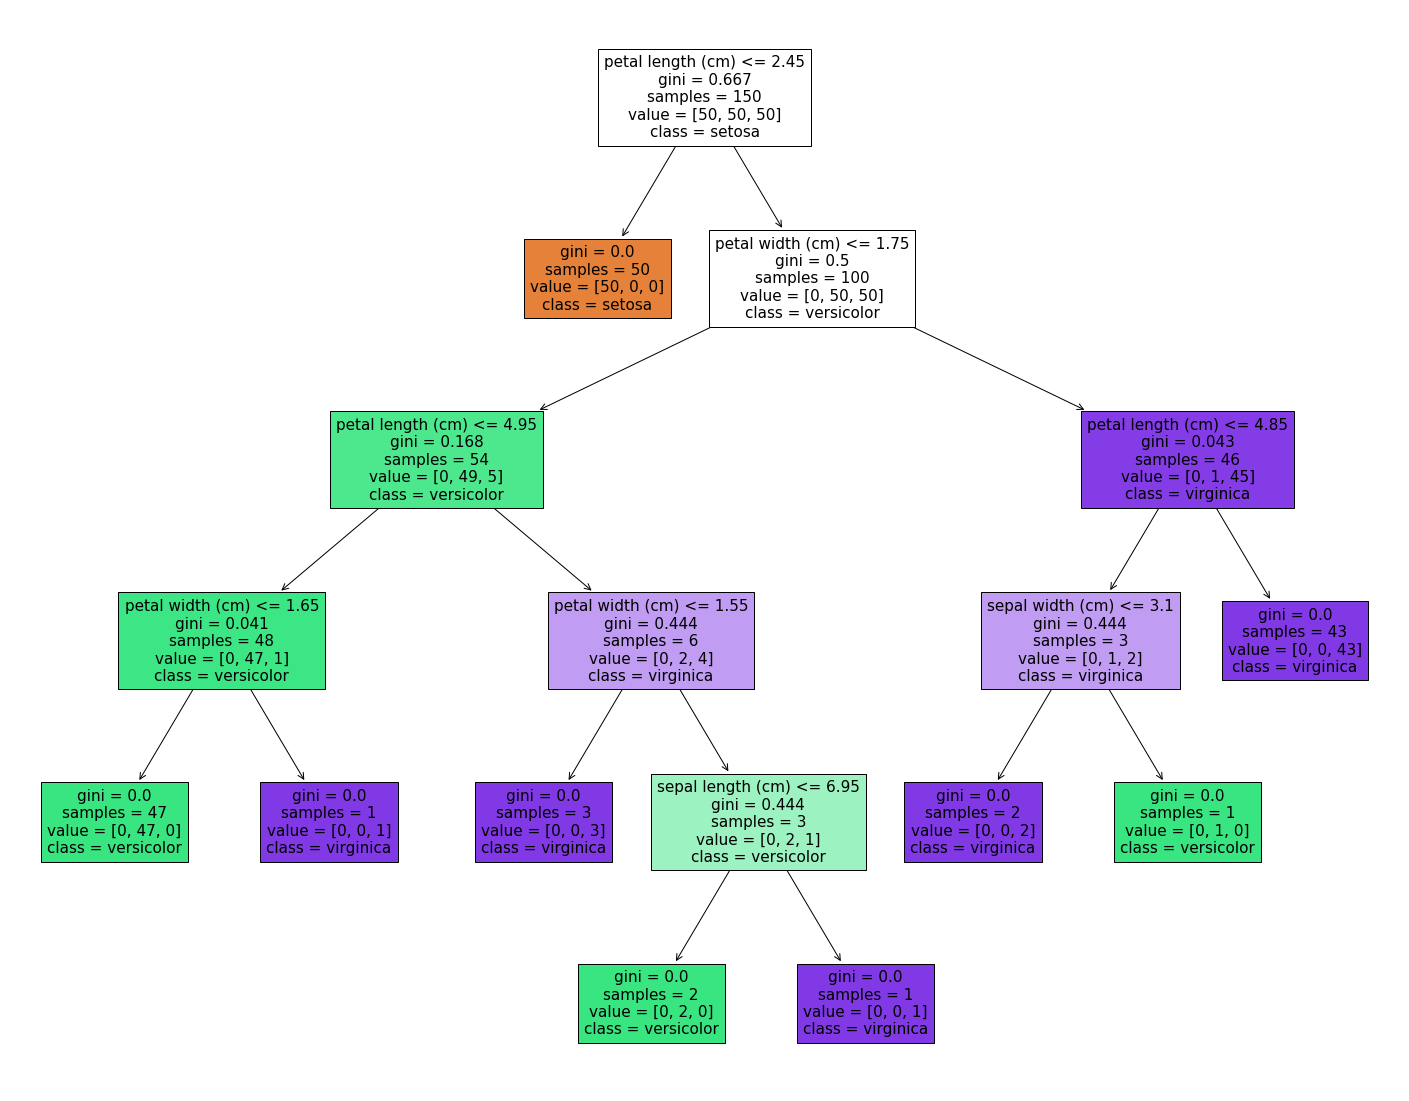

In [12]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


In [13]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])


array([0.5])

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


[ 1  2  3  4  5  6  7  8  9 10]


['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO']
[150000.]


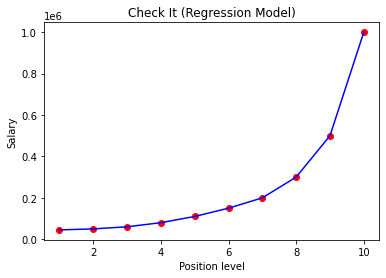

In [14]:
#Small Dataset without having to split the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#importing the dataset
dataset=pd.read_csv('position_salaries.csv')

#Dataset's column begin with 0, 1,2
#dataset.iloc[:,1:2] gives you a 2-d dataframe (columns from 1 to 2)
#dataset.iloc[:,1] gives you a pandas series (1-d) (from column 1).
X=dataset.iloc[:,[1]].values
y=dataset.iloc[:,2].values
z=dataset.iloc[:,1].values
a=dataset.iloc[:,0].values

print(X)
print("\n")
print(y)
print("\n")
print(z)
print("\n")
print(a)

#fitting the decision tree regression model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

y_pred = regressor.predict([[6.5]])
print(y_pred)

#5 Visualising the Decision Tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


[[148]
 [ 85]
 [183]
 [ 89]
 [137]
 [116]
 [ 78]
 [115]
 [197]
 [125]
 [110]
 [168]
 [139]
 [189]
 [166]
 [100]
 [118]
 [107]
 [103]
 [115]
 [126]
 [ 99]
 [196]
 [119]
 [143]
 [125]
 [147]
 [ 97]
 [145]
 [117]
 [109]
 [158]
 [ 88]
 [ 92]
 [122]
 [103]
 [138]
 [102]
 [ 90]
 [111]
 [180]
 [133]
 [106]
 [171]
 [159]
 [180]
 [146]
 [ 71]
 [103]
 [105]
 [103]
 [101]
 [ 88]
 [176]
 [150]
 [ 73]
 [187]
 [100]
 [146]
 [105]
 [ 84]
 [133]
 [ 44]
 [141]
 [114]
 [ 99]
 [109]
 [109]
 [ 95]
 [146]
 [100]
 [139]
 [126]
 [129]
 [ 79]
 [  0]
 [ 62]
 [ 95]
 [131]
 [112]
 [113]
 [ 74]
 [ 83]
 [101]
 [137]
 [110]
 [106]
 [100]
 [136]
 [107]
 [ 80]
 [123]
 [ 81]
 [134]
 [142]
 [144]
 [ 92]
 [ 71]
 [ 93]
 [122]
 [163]
 [151]
 [125]
 [ 81]
 [ 85]
 [126]
 [ 96]
 [144]
 [ 83]
 [ 95]
 [171]
 [155]
 [ 89]
 [ 76]
 [160]
 [146]
 [124]
 [ 78]
 [ 97]
 [ 99]
 [162]
 [111]
 [107]
 [132]
 [113]
 [ 88]
 [120]
 [118]
 [117]
 [105]
 [173]
 [122]
 [170]
 [ 84]
 [ 96]
 [125]
 [100]
 [ 93]
 [129]
 [105]
 [128]
 [106]
 [108]

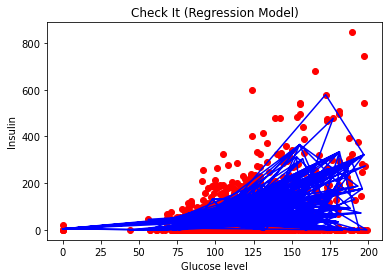

In [15]:
#Load a big dataset and without split it into training as well as testing sets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#importing the dataset
dataset=pd.read_csv('pima-indians-diabetes.csv')

#Dataset's column begin with 0, 1,2
#dataset.iloc[:,[1]] gives you a 1-d dataframe (column 1)
#dataset.iloc[:,1] gives you a pandas series (1-d) (from column 1).
X=dataset.iloc[:,[1]].values
y=dataset.iloc[:,4].values


print(X)
print("\n")
print(y)
print("\n")

print(dataset['glucose'].count())
print(dataset['insulin'].count())
#print(y.count())


#fitting the decision tree regression model to the dataset without splitting the dataset
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

#5 Visualising the Decision Tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Glucose level')
plt.ylabel('Insulin')
plt.show()


[102.          90.16666667  78.5         29.6         85.4
  68.5         15.          88.16666667 144.33333333  73.25
  37.14285714  96.33333333 118.5         19.6         35.
  46.7         60.8          0.           0.          60.
  68.5         35.          88.4         19.6         78.5
   0.         126.66666667 127.25        33.16666667  39.
   0.           0.           0.         144.         126.66666667
  40.         271.5        126.66666667  92.33333333 207.5
   0.          95.         126.66666667  68.5         27.83333333
 357.5         37.14285714  50.6         90.16666667 369.
  51.66666667  65.          60.          95.          75.
  36.         357.5         42.5         92.33333333 160.5
 144.33333333  72.25        78.5         27.83333333  60.8
  73.25        48.5         33.6         68.5        369.
   0.          25.          66.33333333  50.6         68.5
  68.5         47.5         19.6         88.16666667  75.
 357.5         68.5          0.          95.    

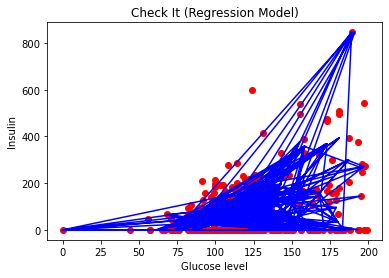

In [16]:
#Load a big dataset and without split it into training as well as testing sets
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

#load the dataset
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()
                        
#split train and test dataset
X = dataset['glucose']
y = dataset['insulin']
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

#Fit x_train and y-train into the regression model
#fitting the decision tree regression model to the dataset without splitting the dataset
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

#Obtain predicted y values (i.e. insulin) based on x test values
y_pred = regressor.predict(x_test)
print(y_pred)

#Model evaluation
#we evaluate our model by finding the root mean squared error produced by the model.
#use numpy np.sqrt
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\n")
print("The root mean square error is: ", rmse)

#5 Visualising the Decision Tree Regression results based on x_train and y_train
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Glucose level')
plt.ylabel('Insulin')
plt.show()